<a href="https://colab.research.google.com/github/gajanan-nawle/Capstone-Project2-Exploratory-Data-Analysis/blob/main/Capstone_Project_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: Data Ingestion and Preparation.**

## **1) Import Libraries & Load Data**

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for cleaner plots
sns.set_style('whitegrid')

# Run this in a new cell FIRST to unzip the files
!unzip titles.csv.zip
!unzip credits.csv.zip

# Load the datasets
df_titles = pd.read_csv('titles.csv')
df_credits = pd.read_csv('credits.csv')

print("Files loaded successfully!")

Archive:  titles.csv.zip
  inflating: titles.csv              
Archive:  credits.csv.zip
  inflating: credits.csv             
Files loaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## **2) Initial Inspection**

In [ ]:
# 1. Inspect df_titles
print("--- Titles Info ---")
df_titles.info()

print("\n\n--- Credits Info ---")
# 2. Inspect df_credits
df_credits.info()

--- Titles Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes

In [ ]:
# 3. Preview the first 5 rows of df_titles
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [ ]:
# 4. Preview the first 5 rows of df_credits
df_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


# **STEP 2: Data Cleaning and Preprocessing.**

## **1) Handle Missing Values**

In [ ]:
# 1. See the count of missing values in each column
print("--- Missing Values Before Cleaning (Titles) ---")
print(df_titles.isnull().sum())

print("\n" + "="*50 + "\n")

print("--- Missing Values Before Cleaning (Credits) ---")
print(df_credits.isnull().sum())

# 2. Fix the obvious missing values
# Fill 'seasons' NaN with 0 (since these are movies)
df_titles['seasons'] = df_titles['seasons'].fillna(0)

# Fill 'age_certification' NaN with 'Not Rated'
df_titles['age_certification'] = df_titles['age_certification'].fillna('Not Rated')

# 3. Check the 'titles' DataFrame again to confirm our fix
print("\n\n--- Missing Values After Cleaning (Titles) ---")
print(df_titles.isnull().sum())

--- Missing Values Before Cleaning (Titles) ---
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64


--- Missing Values Before Cleaning (Credits) ---
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


--- Missing Values After Cleaning (Titles) ---
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_i

## **2) Handle and Explode the 'genres' Column**

1) Drop any titles that have no genre listed (as they aren't useful for genre analysis).
2) Safely convert the string-list into a real list.
3) Create a new, clean DataFrame called df_genres_exploded where each row has only one genre.

In [ ]:
import ast # This library helps safely evaluate the string-list

#Handle the 'genres' column
# 1. Drop titles where genre is missing, as we can't analyze them
df_titles_clean = df_titles.dropna(subset=['genres'])

# 2. Convert the string representation of a list into an actual list
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return np.nan

df_titles_clean['genres_list'] = df_titles_clean['genres'].apply(safe_literal_eval)

# 3. "Explode" the DataFrame. Each genre in the list will get its own row.
# This is our new primary DataFrame for genre analysis.
df_genres_exploded = df_titles_clean.explode('genres_list')

# Rename the new column for clarity
df_genres_exploded.rename(columns={'genres_list': 'genre'}, inplace=True)


# --- Check the result ---
print("--- 'genres' column before exploding ---")
print(df_titles_clean[['id', 'title', 'genres_list']].head())

print("\n" + "="*50 + "\n")

print("--- 'df_genres_exploded' DataFrame after exploding ---")
print(df_genres_exploded[['id', 'title', 'genre']].head())

print(f"\nOriginal title count: {len(df_titles_clean)}")
print(f"Exploded genre row count: {len(df_genres_exploded)}")

--- 'genres' column before exploding ---
        id                        title  \
0  ts20945            The Three Stooges   
1  tm19248                  The General   
2  tm82253  The Best Years of Our Lives   
3  tm83884              His Girl Friday   
4  tm56584            In a Lonely Place   

                                         genres_list  
0  [comedy, family, animation, action, fantasy, h...  
1    [action, drama, war, western, comedy, european]  
2                              [romance, war, drama]  
3                           [comedy, drama, romance]  
4                         [thriller, drama, romance]  


--- 'df_genres_exploded' DataFrame after exploding ---
        id              title      genre
0  ts20945  The Three Stooges     comedy
0  ts20945  The Three Stooges     family
0  ts20945  The Three Stooges  animation
0  ts20945  The Three Stooges     action
0  ts20945  The Three Stooges    fantasy

Original title count: 9871
Exploded genre row count: 22274


# **STEP 3: Exploratory Data Analysis & Visualization.**

## **1) Visualization 1 - Content Type (Movie vs. TV Show)**

This code will count the number of 'Movie' and 'TV Show' entries and plot them as a pie chart.

--- Show Type Counts ---
type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64




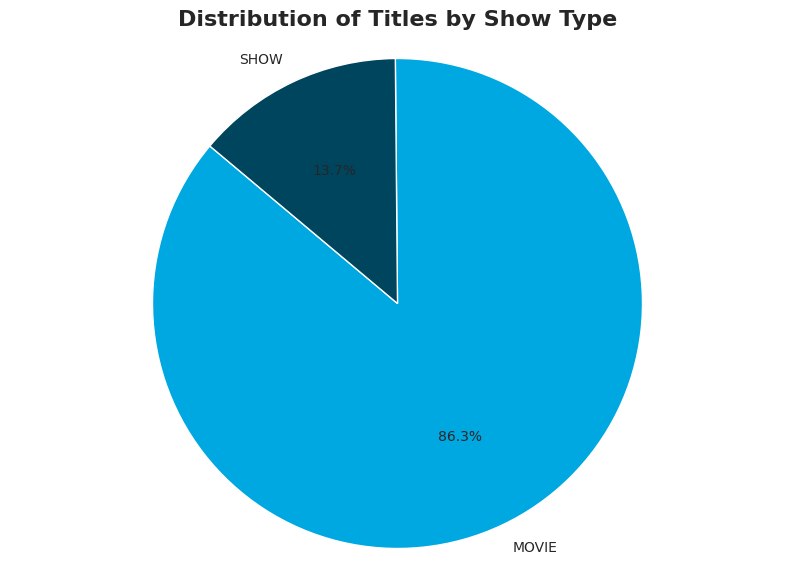

In [ ]:
# --- Calculate the counts using the correct column name 'type' ---
show_type_counts = df_titles['type'].value_counts()

print("--- Show Type Counts ---")
print(show_type_counts)
print("\n")

# --- Create the Pie Chart ---
plt.figure(figsize=(10, 7))
plt.pie(
    show_type_counts,
    labels=show_type_counts.index,
    autopct='%1.1f%%',  # Adds the percentage label
    startangle=140,
    colors=['#00a8e1', '#00455e'] # Amazon Prime-like colors
)

plt.title('Distribution of Titles by Show Type', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **2) Visualization 2 - Top Genres**

Let's plot a horizontal bar chart to find out which genres are the most common on the platform.

The code will count the occurrences of each genre and plot the most frequent ones.

--- Top 15 Genres ---
genre
drama            4764
comedy           2987
thriller         2119
action           1820
romance          1752
crime            1251
documentation    1096
horror           1065
family            751
european          712
scifi             705
fantasy           554
western           490
animation         475
music             438
Name: count, dtype: int64




/tmp/ipython-input-3036184329.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


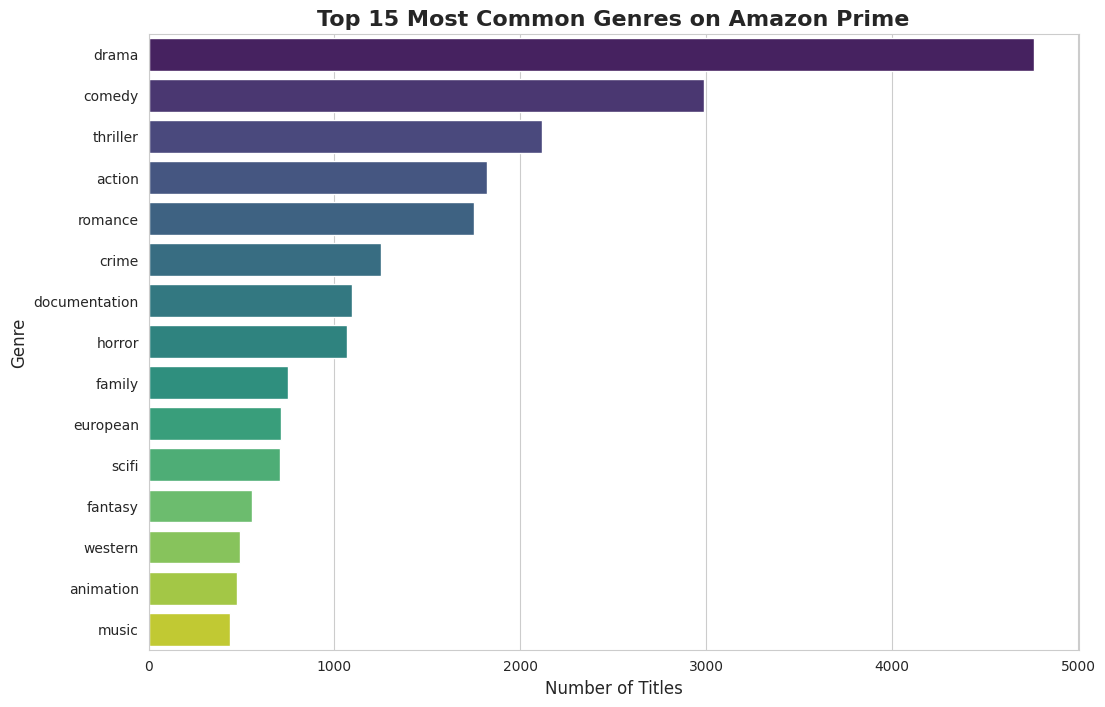

In [ ]:
#Calculate genre counts
# We use the 'genre' column from our exploded DataFrame
genre_counts = df_genres_exploded['genre'].value_counts()

#Get the Top 15 genres
top_15_genres = genre_counts.head(15)

print("--- Top 15 Genres ---")
print(top_15_genres)
print("\n")

#Create the Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_15_genres.values,
    y=top_15_genres.index,
    palette='viridis') # color palette name

plt.title('Top 15 Most Common Genres on Amazon Prime', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

## **3) Visualization 3 - Content Evolution Over Time**

let's analyze how Amazon Prime's content library has grown over the years. This helps us answer the "Trends Over Time" part of the problem statement.

--- Titles Released Per Year (1980 onwards) ---
release_year
2013    345
2014    369
2015    371
2016    497
2017    581
2018    685
2019    807
2020    698
2021    856
2022     89
Name: id, dtype: int64




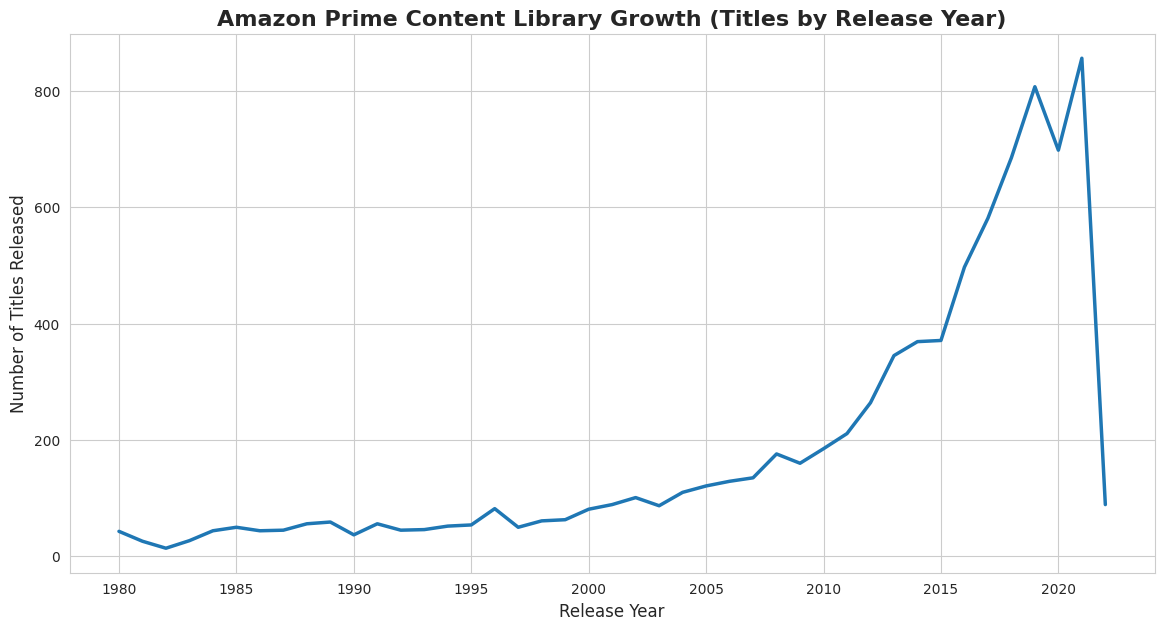

In [ ]:
# Calculate counts by release year
# Group by 'release_year' and count the number of titles using 'id'
titles_by_year = df_titles.groupby('release_year')['id'].count()

# Filter for a more relevant time period (e.g., 1980 to present)
titles_by_year_filtered = titles_by_year[titles_by_year.index >= 1980]

print("--- Titles Released Per Year (1980 onwards) ---")
print(titles_by_year_filtered.tail(10)) # Show the last 10 years
print("\n")

#Create the Line Chart
plt.figure(figsize=(14, 7))
sns.lineplot(
    x=titles_by_year_filtered.index,
    y=titles_by_year_filtered.values,
    linewidth=2.5
)

plt.title('Amazon Prime Content Library Growth (Titles by Release Year)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)

plt.xticks(np.arange(1980, 2024, 5))
plt.show()

## **4) Visualization 4 - Ratings Correlation (IMDb vs. TMDB)**

We want to see how the two main rating systems, IMDb and TMDB, compare. A scatter plot is the perfect tool for this. We'll plot IMDb scores against TMDB scores to see if there's a correlation.

It will calculate and print the Pearson correlation coefficient (between -1 and 1) to get a precise statistical measure of the relationship.


--- Correlation between IMDb and TMDB scores ---
Pearson Correlation: 0.5810
A value close to 1 means they are strongly correlated.



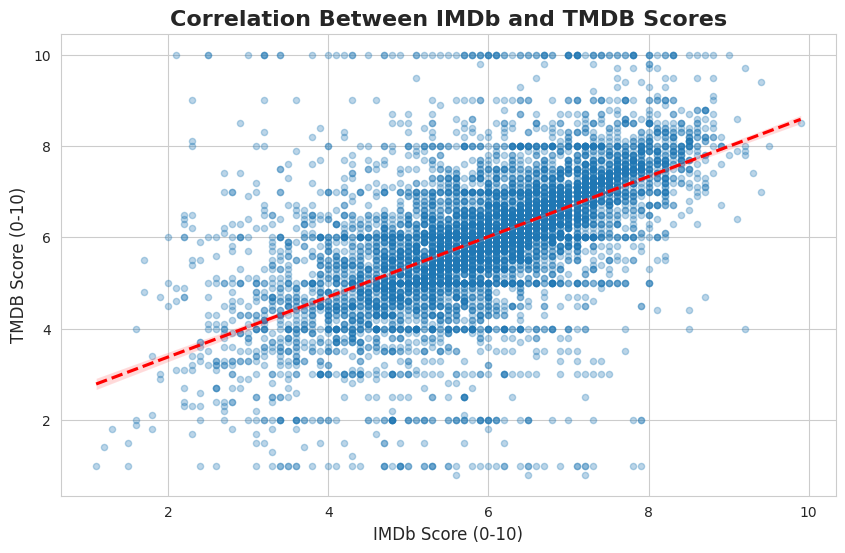

In [ ]:
# Prepare data for correlation
# Drop rows where either score is missing
ratings_df = df_titles.dropna(subset=['imdb_score', 'tmdb_score'])

# Calculate Correlation
correlation = ratings_df['imdb_score'].corr(ratings_df['tmdb_score'])
print(f"--- Correlation between IMDb and TMDB scores ---")
print(f"Pearson Correlation: {correlation:.4f}")
print("A value close to 1 means they are strongly correlated.\n")

# Create the Scatter Plot
plt.figure(figsize=(10, 6))
# Using sns.regplot() adds a regression line to better visualize the trend
sns.regplot(
    data=ratings_df,
    x='imdb_score',
    y='tmdb_score',
    scatter_kws={'alpha': 0.3, 's': 20}, # Make points semi-transparent
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title('Correlation Between IMDb and TMDB Scores', fontsize=16, fontweight='bold')
plt.xlabel('IMDb Score (0-10)', fontsize=12)
plt.ylabel('TMDB Score (0-10)', fontsize=12)
plt.show()

## **5) Visualization 5 - Distribution of IMDb Scores**

This code will create a histogram (a frequency distribution plot) of the IMDb scores.

--- IMDb Score Analysis ---
Mean IMDb Score: 5.98




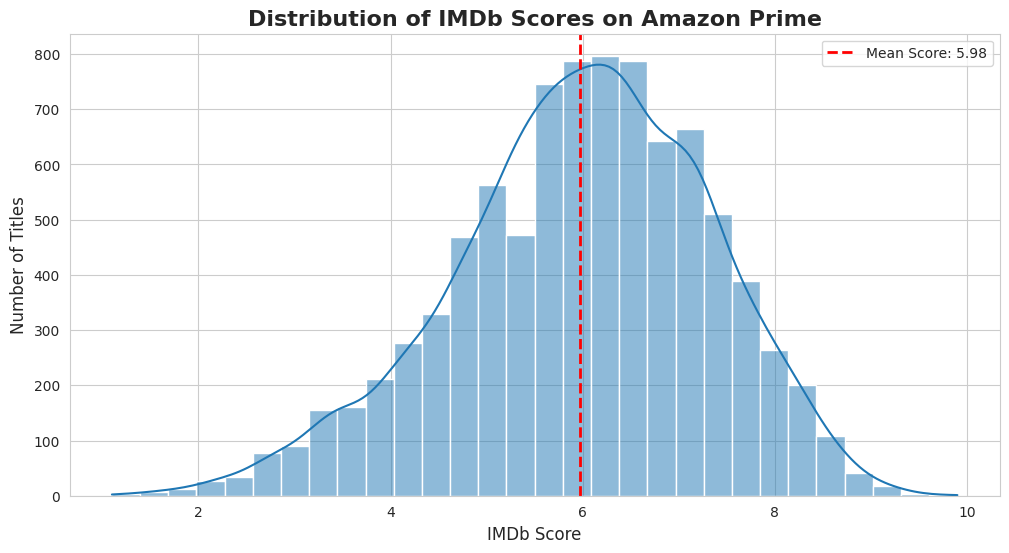

In [ ]:
# Drop rows where 'imdb_score' is missing
scores_clean = df_titles.dropna(subset=['imdb_score'])

# Calculate the mean score for reference
mean_score = scores_clean['imdb_score'].mean()
print(f"--- IMDb Score Analysis ---")
print(f"Mean IMDb Score: {mean_score:.2f}")
print("\n")

# Create the Histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    scores_clean['imdb_score'],
    kde=True,  # Adds the smooth density line
    bins=30    # Divides the data into 30 bars
)

# Add a vertical line for the mean score
plt.axvline(
    mean_score,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mean Score: {mean_score:.2f}'
)

plt.title('Distribution of IMDb Scores on Amazon Prime', fontsize=16, fontweight='bold')
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend()
plt.show()

## **6) Visualization 6 - Top Actors & Directors**

let's analyze the top actors and directors. for that we have to merge our two original dataframes.

This code will:
*   Merge df_titles and df_credits.
*   Separate the data into two lists: one for actors, one for directors.
*   Calculate the Top 10 for each.
*   Plot them on two separate bar charts for easy comparison.

--- Top 10 Actors ---
name
George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Gene Autry              40
Charles King            38
Nassar                  37
Herman Hack             35
George Morrell          34
Forrest Taylor          34
Earl Dwire              34
Name: count, dtype: int64

--- Top 10 Directors ---
name
Joseph Kane           41
Sam Newfield          38
Jay Chapman           34
Lesley Selander       22
John English          21
Harry L. Fraser       21
William Nigh          20
Manny Rodriguez       17
Robert N. Bradbury    17
George Archainbaud    16
Name: count, dtype: int64


/tmp/ipython-input-897445782.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-897445782.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


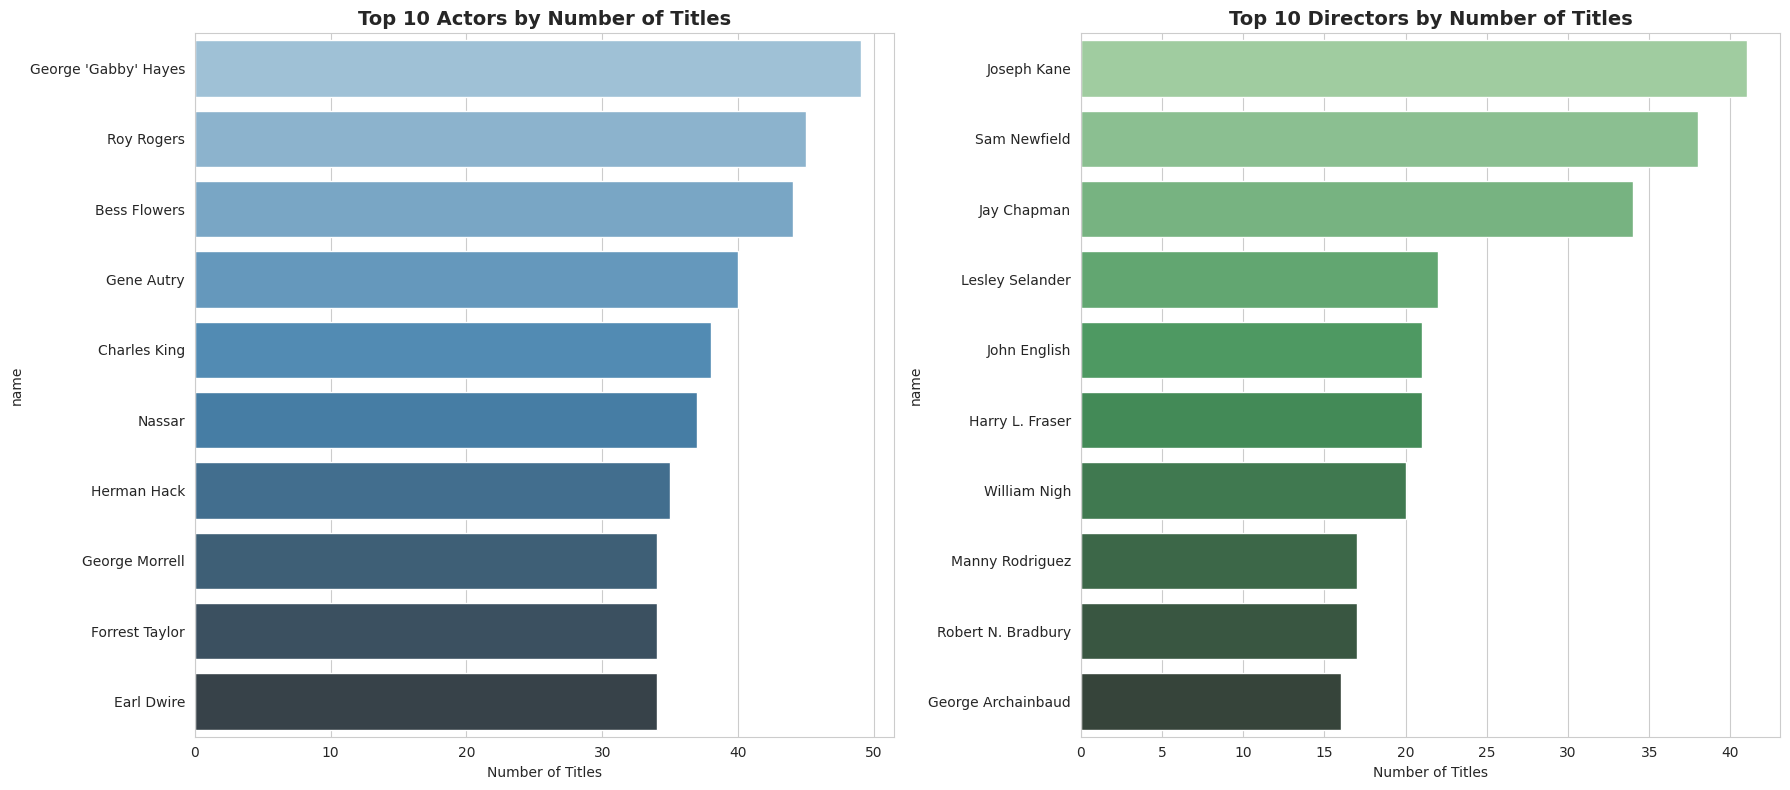

In [ ]:
# 1. Merge the titles and credits DataFrames
# We use an 'inner' merge to only keep titles that have credit information
df_merged = pd.merge(df_titles, df_credits, on='id', how='inner')

# 2. Separate Actors and Directors
# Filter for actors
actors_df = df_merged[df_merged['role'] == 'ACTOR']
top_10_actors = actors_df['name'].value_counts().head(10)

# Filter for directors
directors_df = df_merged[df_merged['role'] == 'DIRECTOR']
top_10_directors = directors_df['name'].value_counts().head(10)

print("--- Top 10 Actors ---")
print(top_10_actors)
print("\n--- Top 10 Directors ---")
print(top_10_directors)

# 3. Create the plots
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Top 10 Actors
sns.barplot(
    x=top_10_actors.values,
    y=top_10_actors.index,
    palette='Blues_d',
    ax=axes[0] # Plot on the first subplot
)
axes[0].set_title('Top 10 Actors by Number of Titles', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Titles')

# Plot Top 10 Directors
sns.barplot(
    x=top_10_directors.values,
    y=top_10_directors.index,
    palette='Greens_d',
    ax=axes[1] # Plot on the second subplot
)
axes[1].set_title('Top 10 Directors by Number of Titles', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Titles')

plt.tight_layout() # Adjusts plots to prevent overlap
plt.show()

# **STEP 4: Drawing Insights and Conclusions.**

### **📊 Project Conclusion: Analysis of Amazon Prime Video**

This Exploratory Data Analysis (EDA) of the Amazon Prime Video dataset has provided several key insights into the platform's content strategy, library composition, and quality.



---


### **1. What We Learned from the Analysis**

####Based on the visualizations, we can conclude the following:

**Content is Overwhelmingly Movie-Focused:** The platform is heavily skewed     towards movies. Your pie chart shows that Movies make up 86.3% of the content, while TV Shows account for only 13.7%.

**'Drama' is the Dominant Genre:** Bar chart clearly identifies Drama as the most common genre by a wide margin (nearly 5,000 titles), followed by Comedy and Thriller.

**Content Quality is Average:** The average IMDb score is 5.98, as shown on histogram. The data forms a classic bell curve, indicating that most content is rated as "average," with no significant skew towards exceptionally high or low-quality titles.

**Aggressive Library Expansion:** The content growth line chart reveals a massive, **exponential increase in titles released (or added) since 2015**. This shows a highly aggressive content acquisition strategy over the last decade. (Note: The sharp drop after 2021 is likely due to the dataset's collection date).

**Classic Talent is Most Prolific:** The top actors and directors (like George 'Gabby' Hayes and Joseph Kane) are predominantly from the classic Hollywood era (1930s-1950s), often associated with Westerns. This suggests Amazon has a very deep catalog of older films.



---


### **2. Validating Initial Assumptions**

####Our initial questions from the project plan were answered directly:

**Assumption:** "Are movies more dominant than TV shows?"

**Answer: Yes, overwhelmingly.** At 86.3%, movies are the clear focus of the library.

**Assumption:** "Are certain genres like Drama or Action more common?"

**Answer: Yes.** Drama is the #1 most common genre, and Action is #4, placing both in the top tier of content.


---


### **3. How This Analysis is Helpful (Stakeholder Insights)**

####This EDA provides actionable intelligence for various teams:

####**For Content Strategists:**
**Opportunity in Quality:** The mean score of 5.98 is a key metric. It shows the biggest opportunity for improvement is not quantity but quality. Acquiring titles with a proven score of 7.0+ could significantly raise the platform's perceived value.

**Identify Niche Gaps:** The library is saturated with 'Drama' and 'Comedy'. The team could find a competitive edge by investing in high-quality content in less-represented genres like Animation, Music, or Sci-Fi (which were at the bottom of your top 15 list).


####**For Marketing Teams:**
**Focus on Top Genres:** Marketing campaigns can confidently promote the platform's extensive Drama, Comedy, and Thriller collections.

**Targeted Campaigns:** A "Classic Movie Night" or "Western Legends" campaign (featuring actors like George 'Gabby' Hayes) could be created to highlight the deep catalog to a specific demographic.


####**For Investors:**
**Proof of Investment:** The content growth chart is the most important one for investors. It visualizes the company's *aggressive multi-year investment* in content to compete with Netflix and others. This demonstrates a strong commitment to growing the service.


---

